In [1]:
import numpy as np
import joblib
import scipy.special
import sys
import matplotlib.pyplot as  plt
from mlxtend.data import loadlocal_mnist
from Templates import MLPClassifier
import pickle
import bz2
from sklearn.manifold import TSNE
from Utils import *
from sklearn.neural_network import MLPClassifier as SKClassifier

import time

In [2]:
x_train , y_train , x_test , y_test = load_dataset('./dataset/')

x_val = x_train[50000:-1,:]
y_val = y_train[50000:-1]
x_train = x_train[0:50000,:]
y_train = y_train[0:50000]                 

In [3]:
activs = ['relu','tanh','linear','sigmoid']
lr = 1e-4
batch_size = 64
weight_init = 'normal'
layers = [784,256,128,64,10]
n_layers = 5
epochs = 100
train = False


In [7]:
if train:
    for i in range(len(activs)):
        n = MLPClassifier(n_layers = 5,layer_sizes = layers, num_epochs=epochs, learning_rate = lr, activation=activs[i],weight_init=weight_init, batch_size=batch_size) 
        n.fit(x_train,y_train,X_val = x_val,Y_val = y_val)
        save_model(n,'./Models/model_'+activs[i]+".pkl")

87452996793017, Acc:0.25 
Epoch: 64/100[20%], Batch Size: 64,Loss:0.19163335932045528, Acc:0.28125 
Epoch: 64/100[40%], Batch Size: 64,Loss:0.20141150469674834, Acc:0.203125 
Epoch: 64/100[60%], Batch Size: 64,Loss:0.20097999356466784, Acc:0.234375 
Epoch: 64/100[80%], Batch Size: 64,Loss:0.18556407178309625, Acc:0.296875 
Epoch: 64/100[100%], Batch Size: 64,Loss:0.19151789034464045, Acc:0.28125 
 === Train Loss: 0.19812 , Train Accuracy: 0.26990, Val Loss: 0.19702 , Val Accuracy: 0.26863 ===
Epoch: 65/100[0%], Batch Size: 64,Loss:0.20321086053670628, Acc:0.21875 
Epoch: 65/100[20%], Batch Size: 64,Loss:0.20067469397497292, Acc:0.3125 
Epoch: 65/100[40%], Batch Size: 64,Loss:0.18307200540343554, Acc:0.390625 
Epoch: 65/100[60%], Batch Size: 64,Loss:0.19793959446674741, Acc:0.265625 
Epoch: 65/100[80%], Batch Size: 64,Loss:0.19289408407783265, Acc:0.28125 
Epoch: 65/100[100%], Batch Size: 64,Loss:0.19799164675274986, Acc:0.28125 
 === Train Loss: 0.19727 , Train Accuracy: 0.26768, Val L

In [4]:
sk_activs = ['relu','tanh','identity','logistic']
if train:
    for i in range(len(activs)):
        n = SKClassifier(hidden_layer_sizes=(256,128,64), activation=sk_activs[i],batch_size = batch_size, learning_rate_init = lr, max_iter = epochs )
        n.fit(x_train,y_train)
        save_model(n,'./Models/skclassifier_'+sk_activs[i]+'.pkl')
        print("SKClassifier %s, Test Accuracy: %f"%(sk_activs[i],n.score(x_test,y_test)),flush = True)


Model saved at ./Models/skclassifier_relu.pkl
SKClassifier relu, Test Accuracy: 0.965600
Model saved at ./Models/skclassifier_tanh.pkl
SKClassifier tanh, Test Accuracy: 0.971600
/home/sirius/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
Model saved at ./Models/skclassifier_identity.pkl
SKClassifier identity, Test Accuracy: 0.915400
Model saved at ./Models/skclassifier_logistic.pkl
SKClassifier logistic, Test Accuracy: 0.970200


Test Accuracy: 0.9827


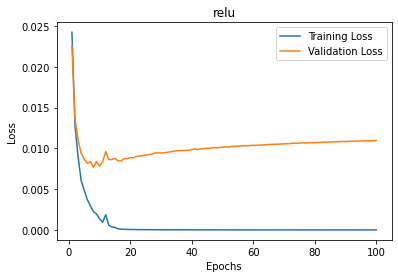

Test Accuracy: 0.9547


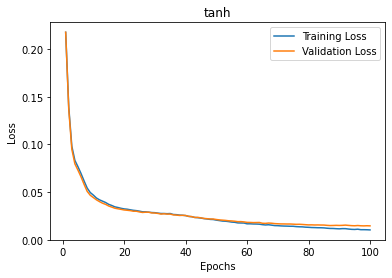

Test Accuracy: 0.9171


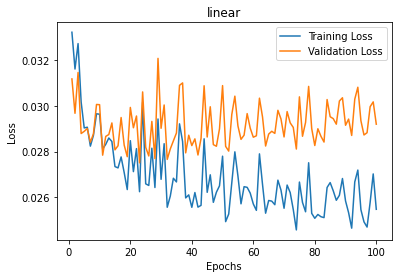

/home/sirius/Desktop/Quick Access/ML/ECE363/assgn2/part_1/Templates.py:218: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-X))


Test Accuracy: 0.3358


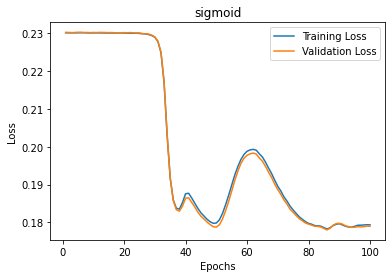

In [5]:
for i in range(len(activs)):
    model = load_model('./Models/model_'+activs[i]+".pkl")
    nepochs = np.array(list(range(model.epochs))) + 1
    plt.plot(nepochs,model.training_loss,label = 'Training Loss')
    plt.plot(nepochs, model.validation_loss, label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(activs[i])
    print("Test Accuracy: {}".format(model.score(x_test,y_test)))
    plt.show()